<a href="https://colab.research.google.com/github/AnalyzrXs/Credit-Card-Fraud-Detection-/blob/main/titanic_survival.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats
from scipy.stats import skew
from scipy.stats import kurtosis

In [ ]:
data = pd.read_csv('/content/titanic.csv')
print(data.head())

   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  


In [ ]:
data.shape

(418, 12)

data.shape

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    bool   
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         418 non-null    float64
 10  Cabin        418 non-null    object 
 11  Embarked     418 non-null    object 
dtypes: bool(1), float64(2), int64(5), object(4)
memory usage: 36.5+ KB


In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1


In [ ]:
data['Age'].fillna(data['Age'].mean(), inplace=True)
data['Cabin'].fillna('Unknown', inplace=True)
data['Fare'].fillna(data['Fare'].mean(), inplace=True)

In [ ]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
print("Skewness: ",data['Age'].skew)
print("Kurtosis: ",data['Age'].kurt)

Skewness:  <bound method Series.skew of 0      34.50000
1      47.00000
2      62.00000
3      27.00000
4      22.00000
         ...   
413    30.27259
414    39.00000
415    38.50000
416    30.27259
417    30.27259
Name: Age, Length: 418, dtype: float64>
Kurtosis:  <bound method Series.kurt of 0      34.50000
1      47.00000
2      62.00000
3      27.00000
4      22.00000
         ...   
413    30.27259
414    39.00000
415    38.50000
416    30.27259
417    30.27259
Name: Age, Length: 418, dtype: float64>


<Axes: ylabel='Age'>

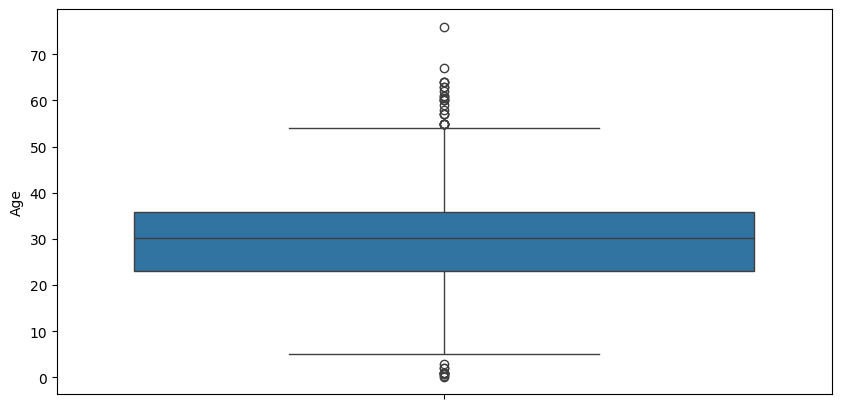

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data['Age'])

In [ ]:
X = data[['Sex', 'Ticket', 'Cabin', 'Pclass', 'Embarked', 'SibSp', 'Parch', 'Fare']]
Y = data['Survived']

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[
    ('encoder', OneHotEncoder(drop='first'), ['Embarked'])  # ✅ This only works with DataFrame
], remainder='passthrough')

X_encoded = ct.fit_transform(X)

# 5. Convert back to DataFrame with proper column names
X = pd.DataFrame(X_encoded, columns=ct.get_feature_names_out())

In [ ]:
data['Sex'] = pd.get_dummies(data['Sex'],drop_first=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = X[col].astype(str)  # Ensure all values are strings
        X[col] = LabelEncoder().fit_transform(X[col])


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier()
classifier.fit(X_train,Y_train)

Y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test,Y_pred)
print(cm)
accuracy_score(Y_test,Y_pred)

[[45  0]
 [ 0 39]]


1.0

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score  # ✅ Required


In [ ]:
def evaluate_classification_preds(y_true, y_preds):
    """
    Calculates and prints classification metrics.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    classification_metric_dict = {
        'accuracy': round(accuracy, 2),
        'precision': round(precision, 2),
        'recall': round(recall, 2),
        'f1': round(f1, 2)
    }
    print(f'Accuracy: {accuracy * 100:.2f}%')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1 score: {f1:.2f}')
    return classification_metric_dict

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np

np.random.seed(25)

train_split = round(0.7 * len(X)) # 70% of data
valid_split = round(train_split + 0.15 * len(Y)) # 15% of data

X_train, Y_train = X[:train_split], Y[:train_split]
X_valid, Y_valid = X[train_split:valid_split], Y[train_split:valid_split]
X_test, Y_test = X[valid_split:], Y[valid_split:]

clf = RandomForestClassifier()
clf.fit(X_train, Y_train)

y_preds = clf.predict(X_valid)
baseline_metrics = evaluate_classification_preds(Y_valid, y_preds)

clf_2 = RandomForestClassifier(max_depth=10)
clf_2.fit(X_train, Y_train)

y_preds_2 = clf_2.predict(X_valid)
max_depth_metrics = evaluate_classification_preds(Y_valid, y_preds_2)


Accuracy: 100.00%
Precision: 1.00
Recall: 1.00
F1 score: 1.00
Accuracy: 100.00%
Precision: 1.00
Recall: 1.00
F1 score: 1.00
